In [6]:
import numpy as np
import math, json
from rdp import rdp
import glob
import io
import base64
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import time
import matplotlib
import random 

In [7]:
from IPython.display import clear_output

while(True):
    clear_output(wait=True)
    print(len(glob.glob('characters/**/**')))
    time.sleep(1) 
    break

30720


In [8]:
def create_data(drawing, center_data = True):
    data = []
    new_data = []
    total_len_strokes = 0
    xs = []
    ys = []
    for item in drawing:
        char = list(item.keys())[0]
        stroke = item[char]
        if len(stroke) > 1:
            for j, (x, y) in enumerate(stroke):
                z = 0 
                if j == len(stroke) - 1:
                    z = 1
                data.append([x, y, z])
        elif len(stroke) == 1:
            x, y = stroke[0]
            data.append([x, y, 0])
            data.append([x+1, y+1, 1])
            
    min_x = min([point[0] for point in data])
    max_x = max([point[0] for point in data])
    min_y = min([point[1] for point in data])
    max_y = max([point[1] for point in data])
    
    margin_x = (600 - max_x - min_x)/2
    margin_y = (600 - max_y - min_y)/2
    
    new_data = [[x + margin_x, y + margin_y, z] for [x, y, z] in data]
    
    if center_data:
        return new_data
    else:
        return data

In [9]:
cmap = matplotlib.cm.get_cmap('Accent')
cmap(random.random())

(0.9411764705882353, 0.00784313725490196, 0.4980392156862745, 1.0)

In [10]:
def map_axes(i, num_sketches = 4):
    sqrt = int(math.sqrt(num_sketches))
    x = np.array(list(range(num_sketches))).reshape((sqrt, sqrt)) 
    dim1, dim2 = np.where(x == i)
    return (int(dim1), int(dim2))


def get_color():
    bl = (0.0, 142/255, 204/255, 1.0)
    cmap = matplotlib.cm.get_cmap('Accent')
    rgba = cmap(random.random())
    if rgba[0] == 1.0 and rgba[1] == 1.0 and rgba[2] == 0.6:
        return bl
    return rgba 

In [11]:
get_color()

(0.7490196078431373, 0.3568627450980392, 0.09019607843137253, 1.0)

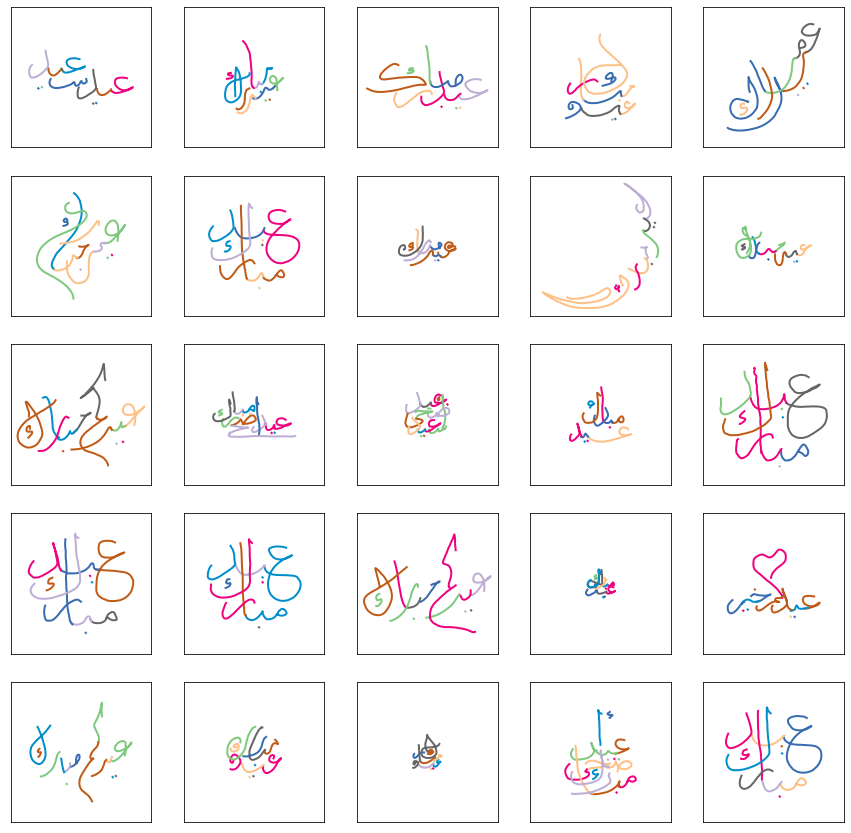

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import shuffle
num_sketches = 25
npy_files = glob.glob('server/larger_data/*')
max_count = 1000  
min_count = 0
c = 0 
# cool_files = ['من كان في حاجة أخيه كان الله في حاجته',
#               '1ان الله مع الذين اتقوا والذين هم محسنون',
#               '1إن هذا القران يهدي للتي هي أقوم',
#               'ومن يوق شح نفسه فأؤلئك هم المفلحون']
# cool_files = ['server/larger_data/'+file+'.json' for file in cool_files]


# for file in cool_files:
#     drawing = create_data(json.load(open(file))) 
#     max_count = max(len(drawing), max_count)

shuffle(npy_files)


def data_gen():
    drawings = []
    
    cnt = 1
    files = []
    for file in npy_files:
        if ('عيد' in file) and ('فطر' not in file) and ('رمضان' not in file) and ('سنة' not in file) and ('يعيد' not in file):
            files.append(file)
            drawing = create_data(json.load(open(file))) 
            if len(drawing) < max_count and len(drawing) > min_count:
                drawings.append(drawing)    
                cnt += 1
            if cnt > num_sketches:
                break
#     print(len(files))
#     print(files)
#     raise('error')
    for drawing in drawings:
        if len(drawing) < max_count:
            while len(drawing) < max_count:
                drawing.append(drawing[-1])

    for i in range(max_count):
        points = []
        for j in range(num_sketches):
            points.append(drawings[j][i])
        yield points

sqrt = int(math.sqrt(num_sketches))
fig, axes = plt.subplots(sqrt, sqrt, figsize=(15,15))

lines = []

for i in range(num_sketches):
    ax = axes[map_axes(i, num_sketches = num_sketches)]
    ax.set_ylim(600, 0)
    ax.set_xlim(0, 600)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='box')
    line, = ax.plot([], [], lw=2, color = get_color())
    lines.append(line) 
    
# initialize the data arrays 
line_data = [([], []) for _ in range(num_sketches)]

def run(data):
    global line_data, num_sketches, c
    for i in range(num_sketches):
        x, y, z = data[i]
        line_data[i][0].append(x)
        line_data[i][1].append(y)
        lines[i].set_data(line_data[i][0], line_data[i][1])
        if z == 1:
            color = plt.cm.hsv(c)
            line, = axes[map_axes(i, num_sketches = num_sketches)].plot([], [], lw=2, color = get_color())
            lines[i] = line
            line_data[i] = [[], []]
            

    return lines

ani = animation.FuncAnimation(fig, run, data_gen, interval=10, repeat=False, save_count=max_count)
d = ani.save(f'video.mp4', extra_args=['-vcodec', 'libx264'])

In [34]:
video = io.open('video.mp4', 'r+b').read()

encoded = base64.b64encode(video)
HTML(data='''<video alt="video" autoplay>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [7]:
%%capture 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import shuffle
num_sketches = 1

        
def save_video(drawing, mx):
    max_count = 1000  
    min_count = 100

    def data_gen():
        for point in drawing:
            yield point



    # initialize the data arrays 
    def run(point):
        global line_data, line
        x, y, z = point
        line_data[0].append(x)
        line_data[1].append(y)
        line.set_data(line_data[0], line_data[1])
        if z == 1:
            line, = ax.plot([], [], lw=2, color = 'k')
            line_data = ([], [])

        return line

    ani = animation.FuncAnimation(fig, run, data_gen, interval=10, repeat=False, save_count=mx)
    d = ani.save(f'video.mp4', extra_args=['-vcodec', 'libx264'])

In [19]:
%%capture 
cntr = 0
line_data = ([], [])
sqrt = int(math.sqrt(num_sketches))
fig, ax = plt.subplots(sqrt, sqrt, figsize=(5,5))
ax.set_ylim(600, 0)
ax.set_xlim(0, 600)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal', adjustable='box')
line, = ax.plot([], [], lw=2, color = 'k')
file = 'server/larger_data/ختم الله على قلوبهم وعلى سمعهم وعلى ابصارهم غشاوة.json'
drawing = create_data(json.load(open(file)))
save_video(drawing, len(drawing))
video = io.open('video.mp4', 'r+b').read()
encoded = base64.b64encode(video)

In [20]:
from IPython.core.display import display, HTML, Video
display(HTML(data='''<video alt="video" autoplay>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))

In [ ]:
cool_files = ['1اللهم صل على محمد وآل محمد',
              '1ان الله مع الذين اتقوا والذين هم محسنون',
              'رب اغفر لي ولوالدي ولمن دخل بيتي مؤمنا وللمؤمنين والمؤمنات',
              'ختم الله على قلوبهم وعلى سمعهم وعلى ابصارهم غشاوة']